# "Trends on Trends" - An Analysis of Youtube Trending Videos


This project will explore how the Youtube creator and other viewers affect the path from viewer to view, within the Youtube platform (excluding outside factors). 

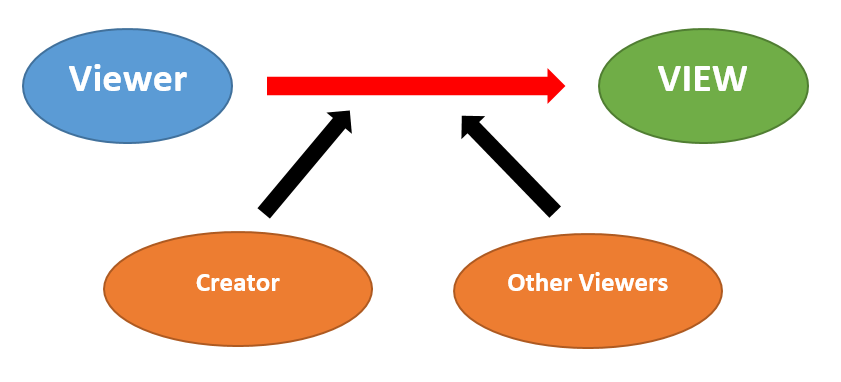

In [16]:
from IPython.display import Image
Image(filename='Youtube Relationship - Diagram.PNG') 


## QUESTIONS TO EXPLORE

### * Are there any patterns that can predict video trendability? 
### * Whose actions correlate with trendability (creator, viewer, platform)?
### * Based on data, any areas Youtube should focus on supporting?

## WHAT MAKES THE BIGGEST DIFFERENCE?

### Effect of Time
### Effect of Content!!!
### Channel Demographics
### Effect of Viewer Feedback

## DATA BACKGROUND & PREVIEW

### What data is available?
* "Daily Record of the Top Trending Youtube Videos"
* Up to 200 trending videos per day
* Two dataframes with the same columns (19). 'df' contains one line per video with final numbers while "df_all_timestamps" contains snapshots throughtout the day. 

### Limitations
* No data on the viewers or path to arrive to video. 

### Questions
* What defines trending? 

In [72]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
filename1 = 'dataframe.csv'
filename2 = 'dataframe_all_timestamps.csv'

datapath1 = os.path.join('..',filename1)
datapath2 = os.path.join('..',filename2)

In [15]:
df = pd.read_csv(datapath1)
df_all_timestamps = pd.read_csv(datapath2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 19 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [6]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [7]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR


In [8]:
df_all_timestamps.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR


In [46]:
# converting date field

def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = pd.to_datetime(df_all_timestamps['string_date_time'], infer_datetime_format=True, errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)

#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = pd.to_datetime(df['string_date_time'], infer_datetime_format=True, errors='coerce')
df = df.drop('string_date_time', axis=1)

In [49]:
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [50]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,9.877554,7.375882,3.178054,5.375278,2017-11-12 17:58:57
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,9.940061,6.940222,6.326149,5.497168,2017-11-12 13:46:18
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,12.242660,7.255591,5.003946,4.510860,2017-11-12 19:08:08
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,9.674074,4.962845,2.397895,2.079442,2017-11-13 19:58:33
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,11.518987,7.056175,3.891820,3.583519,2017-11-13 13:33:26


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 24 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [51]:
df_all_timestamps.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,2017-11-10 17:00:03
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33


## YOUTUBE CREATOR (A LOOK AT CONTENT)

The Youtube Creator has a lot of control over the properties of the channel and video. The following properties are either manually entered by the creator OR are generated from a result of an action by the creator: Title, Description, Thumbnail, Tags, Category, Video Location (country), Comments Disabled, Ratings Disabled, Publish Date, and Publish Time.

This section will explore if the properties that stem from the creator have any correlation with trendability. 

### Findings / Of Notice
* FASDF

### Business Insight
* FASDFS

### Further Study Needed
* fSDFLdsf


### ••• COUNTRY •••

In [27]:
country_count = df['country'].value_counts()
print(country_count)

RU    30783
MX    27900
FR    24085
DE    22965
CA    17338
IN    15222
KR    13793
JP    10808
US     5185
GB     3070
Name: country, dtype: int64


Text(0, 0.5, 'Number of Trending Videos')

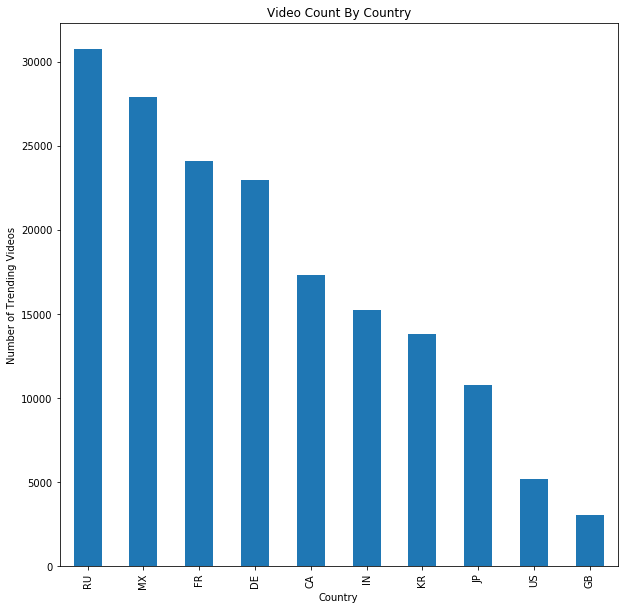

In [17]:
# Bar plot of country

fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
country_count.plot(kind = 'bar', ax = ax)
ax.set_title('Video Count By Country') # Give the plot a main title
ax.set_xlabel('Country') # Set text for the x axis
ax.set_ylabel('Number of Trending Videos')# Set text for y axis


# FINDINGS
# Russia, Mexico, and France are the top 3 origins of most trending videos

Text(0, 0.5, 'Views')

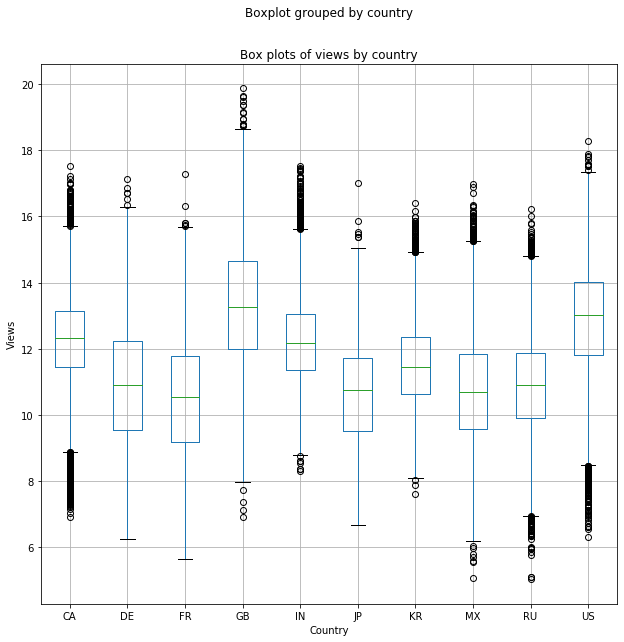

In [55]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
df[['log_views','country']].boxplot(by = 'country', ax = ax)
ax.set_title('Box plots of views by country')
ax.set_xlabel('Country')
ax.set_ylabel('Views')

# What is e?  to the 6th power 

### ••• CATEGORY ••• (COMPLETE)

* Category is subjectively chosen by the creator. 
* Although 'Entertainment' is the most popular category, a closer looks shows that it is used broadly instead of better matching categories
* With this in mind, is a better solution to make categories more descriptive for Youtube OR should the creator play around this?
* If 'Entertainment' videos trend better and assuming category is used in suggestion algorithms, the Youtube creator should consider if he/she would prefer to use a wider category that may reach more people but might not fit what the viewer is looking for OR if they prefer to select the category that better matches their video, targets less viewers, is less competitive, and perhaps it is more relevant to what the viewer is looking for. 

In [25]:
category_count = df['category'].value_counts()
print(category_count)

Entertainment            50468
People & Blogs           28045
News & Politics          20327
Sports                   12561
Comedy                   10358
Music                    10145
Howto & Style             9580
Film & Animation          8460
Gaming                    5318
Education                 3897
Science & Technology      3404
Autos & Vehicles          3274
Pets & Animals            2271
Nonprofits & Activism     1779
Travel & Events            812
Shows                      435
Movies                      12
Trailers                     3
Name: category, dtype: int64


Text(0, 0.5, 'Number of Trending Videos')

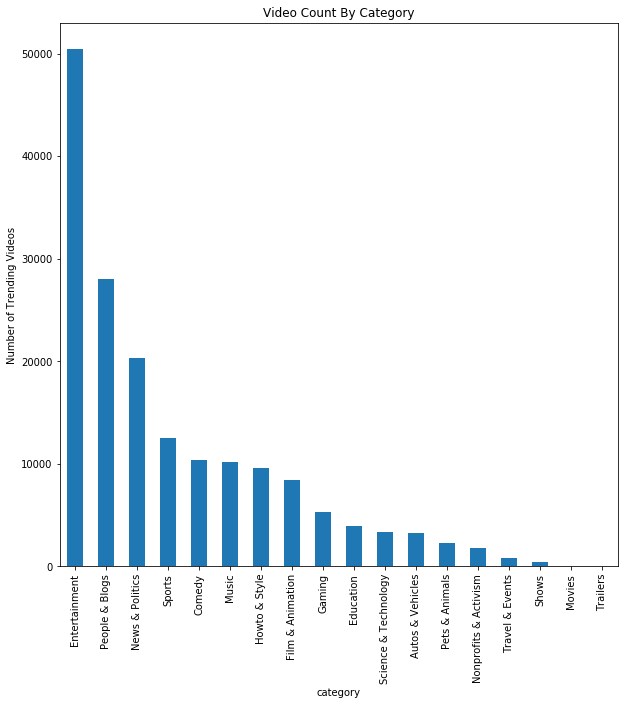

In [26]:
# Bar plot per category

fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
category_count.plot(kind = 'bar', ax = ax)
ax.set_title('Video Count By Category') # Give the plot a main title
ax.set_xlabel('category') # Set text for the x axis
ax.set_ylabel('Number of Trending Videos')# Set text for y axis

# Findings 


In [69]:
# Is Entertainment category more popular OR is it used very leniently, based on US?
# Qualitative Assessment
# Checking US top 5 and bottom 5, you can see a movie trailer miscategorized as entertainment (675)
# It also seems to be a catch all of hard-to-categorize videos such as #666 (Shows, People and Blogs, News)

entertainment = df['category'] == 'Entertainment'
US = df['country'] == 'US'
df[entertainment & US]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp
322,zYWt2mnalP8,2017-11-14,How To Do Thanksgiving Makeup That Has Nothing...,Sailor J,24,Entertainment,2017-11-08,00:03:47,"Thanksgiving|""Tutorial""|""Makeup""",160477,8388,691,950,https://i.ytimg.com/vi/zYWt2mnalP8/default.jpg,False,False,False,Center for American Indian Research & Native S...,US,11.985912,9.034677,6.539586,6.857514,2017-11-08 00:03:47
666,cOc3tsFWoRs,2017-11-14,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,24,Entertainment,2017-11-10,09:35:00,"James Corden|""The Late Late Show""|""Colbert""|""l...",1497519,15504,353,1084,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,False,James congratulates Jason Momoa on recently ma...,US,14.219321,9.648918,5.869297,6.989335,2017-11-10 09:35:00
672,F-j_6IuaYfw,2017-11-14,I Miss the Old Taylor,Wong Fu Productions,24,Entertainment,2017-11-08,21:05:20,"taylor swift|""swiftie""|""reputation""|""ready for...",476389,16106,950,2077,https://i.ytimg.com/vi/F-j_6IuaYfw/default.jpg,False,False,False,A new Taylor Swift is upon us! Some people jus...,US,13.073992,9.687009,6.857514,7.639161,2017-11-08 21:05:20
674,Y6eKxjMA9ek,2017-11-14,"Dropping And CATCHING A Paper Airplane At 2,00...",Tucker Gott,24,Entertainment,2017-11-09,16:00:09,"paramotor|""tucker""|""gott""|""tucker gott""|""param...",175852,15909,200,852,https://i.ytimg.com/vi/Y6eKxjMA9ek/default.jpg,False,False,False,After failing the paper airplane drop a few ye...,US,12.077404,9.674703,5.303305,6.748760,2017-11-09 16:00:09
675,zy0b9e40tK8,2017-11-14,Dark | Official Trailer [HD] | Netflix,Netflix,24,Entertainment,2017-11-09,09:00:07,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750,5642,146,675,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...,US,12.844634,8.638171,4.990433,6.516193,2017-11-09 09:00:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169876,vRWH9GQ2J90,2018-06-14,100 LAYERS OF DEEP FRIED PIZZA 🍕CHALLENGE!!!,HellthyJunkFood,24,Entertainment,2018-06-03,14:22:17,"100 layers|""pizza""|""100 layers of pizza""|""deep...",1083920,20667,4067,4327,https://i.ytimg.com/vi/vRWH9GQ2J90/default.jpg,False,False,False,Download Fortnite! https://pixly.go2cloud.org/...,US,13.896096,9.936342,8.310907,8.372861,2018-06-03 14:22:17
169878,n-DTjpde9-0,2018-06-14,"Spinning a Record to Pieces at 12,500fps - The...",The Slow Mo Guys,24,Entertainment,2018-06-02,21:42:35,"slomo|""slow""|""mo""|""super""|""motion""|""Slow Motio...",4265963,99964,2231,7731,https://i.ytimg.com/vi/n-DTjpde9-0/default.jpg,False,False,False,Gav and Dan take 1 piece of vinyl and spin it ...,US,15.266179,11.512575,7.710653,8.953123,2018-06-02 21:42:35
169879,UTVpWVO4vZU,2018-06-14,SIDEMEN FC VS YOUTUBE ALLSTARS 2018 (Goals & H...,Sidemen,24,Entertainment,2018-06-02,20:00:23,"sidemen|""sidemen fc""|""youtube allstars""|""sidem...",7177740,172730,9205,20840,https://i.ytimg.com/vi/UTVpWVO4vZU/default.jpg,False,False,False,DONATE HERE: http://bit.ly/DonateSDMNSuperchat...,US,15.786495,12.059491,9.127611,9.944677,2018-06-02 20:00:23
169885,t_bnyOOFDNM,2018-06-14,COLLEGE KIDS REACT TO ROSEANNE CANCELED?! (Twi...,FBE,24,Entertainment,2018-06-01,21:00:02,"roseanne twitter controversy|""roseanne cancell...",1255834,21773,3880,18299,https://i.ytimg.com/vi/t_bnyOOFDNM/default.jpg,False,False,False,The Roseanne Twitter controversy discussed by ...,US,14.043311,9.988472,8.263848,9.814656,2018-06-01 21:00:02


### ••• DESCRIPTION ••• (COMPLETE)

No insight as all videos have a description

In [82]:
no_description = df['description'] == None
df[no_description]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp


### ••• TAGS •••

* Tag count does not directly correlate with views but we can see patterns on how many tags 'trending' views tend to have. 
* Now, we can recommend tag count for a Youtube creator. 
* The average tag count of trending videos is 17 and it should be kept within 7 and 25 (the range followed by 50% of trending videos). Every trending video has at least 1

In [139]:
# every video has tags

no_tags = df['tags'] == None
df[no_tags]

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,tag_count


In [140]:
# make new column called tag_count

df['tag_count'] = None

In [143]:
# put data into the column

df['tag_count'] = df['tags'].str.split(r'|')
df.loc[:,'tag_count'] = df['tag_count'].apply(lambda x: len(x))
        

In [142]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,tag_count
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,None,FR,9.877554,7.375882,3.178054,5.375278,2017-11-12 17:58:57,44
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,None,FR,9.940061,6.940222,6.326149,5.497168,2017-11-12 13:46:18,9
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,None,FR,12.242660,7.255591,5.003946,4.510860,2017-11-12 19:08:08,8
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,None,FR,9.674074,4.962845,2.397895,2.079442,2017-11-13 19:58:33,22
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,None,FR,11.518987,7.056175,3.891820,3.583519,2017-11-13 13:33:26,6


In [136]:
df = df.drop(columns=['tag_number'])

Text(0, 0.5, 'Views')

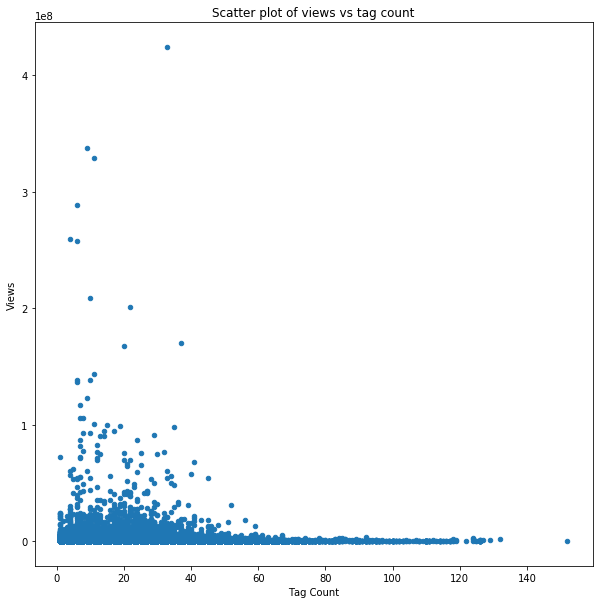

In [147]:
# Tag count vs views

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()                   
df.plot(kind = 'scatter', x = 'tag_count', y = 'views', ax = ax)
ax.set_title('Scatter plot of views vs tag count')
ax.set_xlabel('Tag Count') 
ax.set_ylabel('Views')

In [150]:


df['tag_count'].describe()

count    171149.000000
mean         17.148222
std          13.284787
min           1.000000
25%           7.000000
50%          15.000000
75%          25.000000
max         152.000000
Name: tag_count, dtype: float64

## OTHER YOUTUBE VIEWERS (A LOOK AT FEEDBACK)

Viewers can now interact with the platform and provide limited feedback on a video, wnen allowed by the creator. The following properties are a result of actions from the viewer community: comments, likes, and dislikes. Views and trending_date are not included here as these are the desired result that define success. 

This section will explore if the properties that stem from viewers have any correlation with trendability.

### Findings / Of Notice
* FASDF

### Business Insight
* FASDFS

### Further Study Needed

Note, this project only includes total select properties; there is no assessment on who gets drawn to a video and how. This section only explores if feedback within the platform has an effect and/or can predict trendability 

In [41]:
comments_disabled_count = df['comments_disabled'].value_counts()
print(comments_disabled_count)

False    167027
True       4122
Name: comments_disabled, dtype: int64


Text(0, 0.5, 'Views')

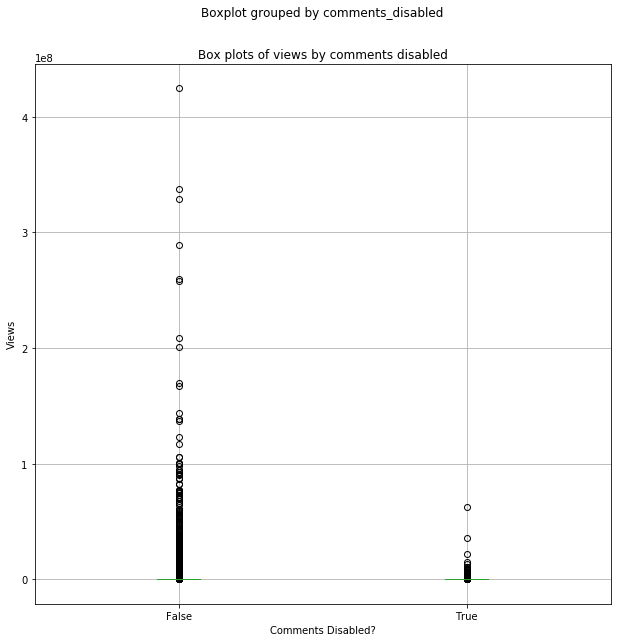

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
df[['views','comments_disabled']].boxplot(by = 'comments_disabled', ax = ax)
ax.set_title('Box plots of views by comments disabled')
ax.set_xlabel('Comments Disabled?')
ax.set_ylabel('Views')

In [77]:
# plot = df.plot.pie(y='comments_disabled', figsize=(5, 5))

# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(df['comments_disabled'], labels=df['True or False'], shadow=False, colors=colors, explode=(0, 0, 0, 0, 0.15), startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.tight_layout()
plt.show()

KeyError: 'True or False'